### Лабораторная работа №3. 100,000 UK Used Car Data set
#### Ковшов Валерий, Короп Анастасия, Короп Тимур
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes

Задание:

1. Набор данных для группы 3530903_70302: Mercedes<br>
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Попытаться обучить регрессии c лучшим качеством. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor

In [2]:
auto_data = pd.read_csv("merc.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


model - модель автомобиля <br>
year - год регистрации <br>
transmission - коробка передач <br>
mileage - пробег <br>
fuelType - тип топлива <br>
tax - налог <br>
mpg - расход двигателя <br>
engineSize - объем двигателя

In [3]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [4]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


<AxesSubplot:>

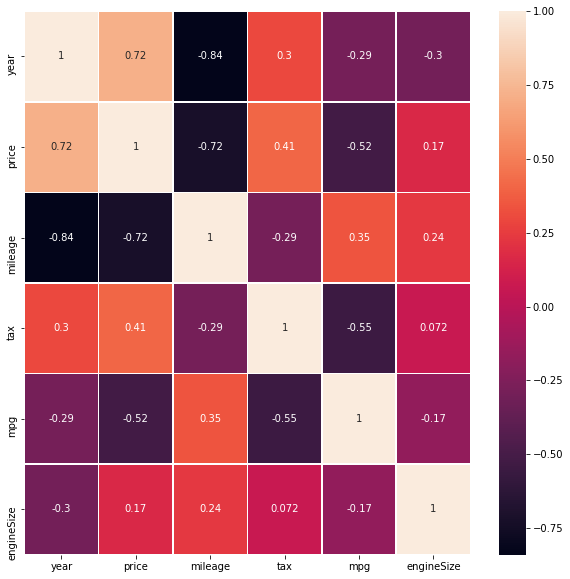

In [5]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(auto_data.corr(method='spearman'), annot = True, linewidths=0.7, ax=ax )

In [6]:
#Разделяем данные на целевую переменную и матрицу
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']

In [7]:
#Преобразование категориальных данных в числа
model_encoder = LabelEncoder()
X.model = model_encoder.fit_transform(X.model)

transmission_encoder = LabelEncoder()
X.transmission = transmission_encoder.fit_transform(X.transmission)

fuelType_encoder = LabelEncoder()
X.fuelType = fuelType_encoder.fit_transform(X.fuelType)

X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,20,2005,0,63000,3,325,32.1,1.8
1,18,2017,0,27000,1,20,61.4,2.1
2,19,2016,0,6200,3,555,28.0,5.5
3,9,2016,0,16000,3,325,30.4,4.0
4,9,2016,0,4000,3,325,30.1,4.0
...,...,...,...,...,...,...,...,...
13114,2,2020,0,500,0,145,55.4,2.0
13115,1,2020,0,2500,0,145,55.4,2.0
13116,13,2019,0,11612,0,145,41.5,2.1
13117,7,2019,0,2426,0,145,45.6,2.0


In [8]:
#Разбиваем данные на тренировочные и тестовые (70% на 30%, random_state=10)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
5967,11,2018,3,6361,0,145,56.5,2.1
3913,2,2018,0,8400,0,145,57.7,2.0
1638,2,2016,3,35991,0,30,64.2,2.1
4714,14,2019,0,5501,0,145,36.7,2.0
5217,13,2020,3,859,3,145,32.1,2.0
...,...,...,...,...,...,...,...,...
11633,13,2019,0,21118,3,150,37.2,2.0
1344,0,2016,3,22433,0,20,74.3,1.5
12815,13,2019,0,11190,0,150,56.5,2.1
7293,0,2019,3,5738,3,145,53.3,1.3


In [9]:
#Стандартизация
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[ 0.88652288,  0.31274615,  0.93838704, ...,  0.23107159,
         0.08277762,  0.05464789],
       [-0.64837722,  0.31274615, -1.18547301, ...,  0.23107159,
         0.1621463 , -0.11893618],
       [-0.64837722, -0.57215538,  0.93838704, ..., -1.520073  ,
         0.59205997,  0.05464789],
       ...,
       [ 1.22761179,  0.75519692, -1.18547301, ...,  0.30720831,
         0.08277762,  0.05464789],
       [-0.98946614,  0.75519692,  0.93838704, ...,  0.23107159,
        -0.12887219, -1.33402463],
       [-0.64837722,  0.31274615,  0.93838704, ...,  0.23107159,
         0.79709573,  0.05464789]])

### LinearRegression()

In [10]:
simple_LR = LinearRegression()

simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)

simple_LR_MSE = metrics.mean_squared_error(Y_test, simple_LR_predictions)

#Среднеквадратичная ошибка
print (f'MSE = {round(simple_LR_MSE,3)}')

MSE = 45631741.07


In [11]:
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared = False)

print (f'RMSE = {round(simple_LR_RMSE,3)}')
print (f'Test std: {round(Y_test.std(),3)}')

RMSE = 6755.127
Test std: 12330.882


Text(0, 0.5, 'Target')

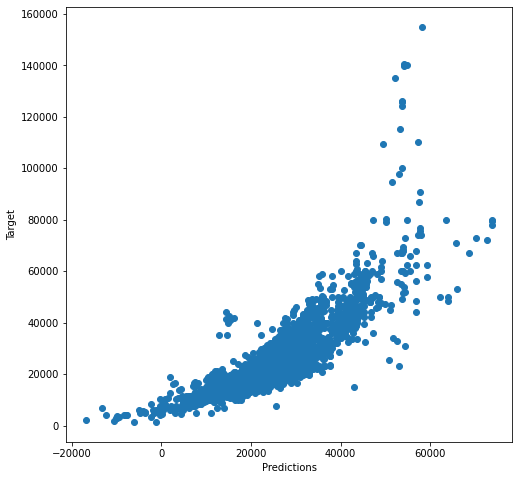

In [12]:
#Распределение ошибок и правильных ответов
plt.figure(figsize=(8, 8))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

Неплохо, но не идеально

### LassoCV()

In [13]:
model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 6757.797


Text(0, 0.5, 'Target')

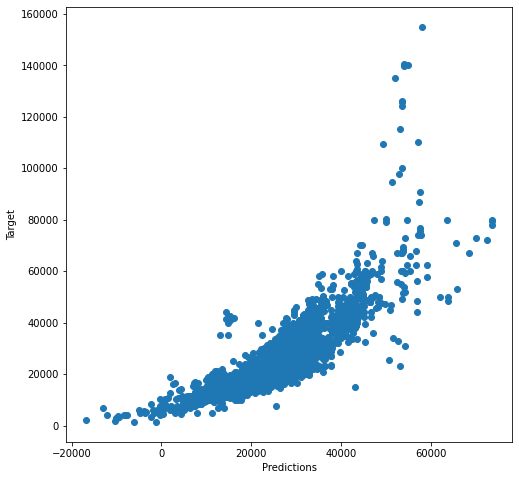

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

### RidgeCV()

In [15]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 6756.418


Text(0, 0.5, 'Target')

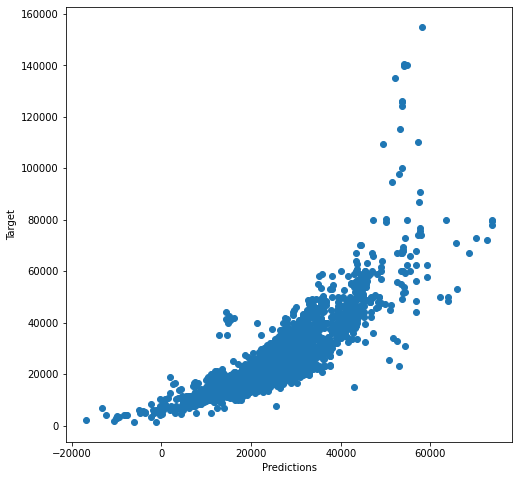

In [16]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

### RandomForestRegressor()

In [17]:
model = RandomForestRegressor(random_state = 10, n_estimators = 100)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

RMSE = 2640.839


Text(0, 0.5, 'Target')

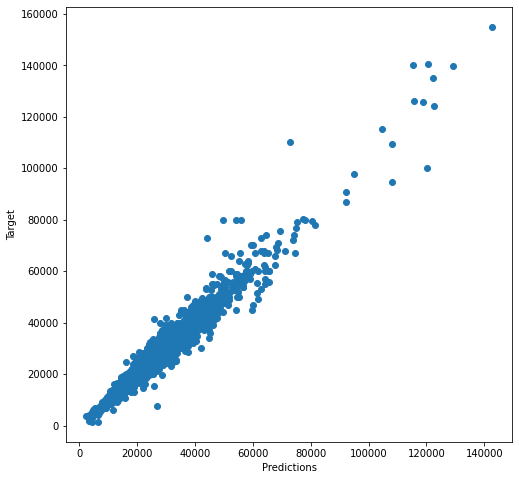

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

Выглядит замечательно!